In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive/')
# import sys
# sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/')

# Importing libraries


In [3]:
## for data
import json
import pandas as pd
import numpy as np
import os
import re

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set(rc={'figure.figsize': [10, 7]}, font_scale=1.0)
from wordcloud import WordCloud


from tqdm import tqdm

## for Hypothesis testing
from scipy import stats


# Helper Functions


In [4]:

# Function to convert list into strings

def action_toString(action):
    
    "Function to convert list into strings"
    action = [ str(i) for i in action ]
    
    action = [ re.sub('nan','',i) for i in action ] 
    
    action = ' '.join(action)
    
    return action



# Function to convert list into strings

def device_toString(device):
    "Function to convert list into strings"
    
    device = [ str(i) for i in device ]
    
    device = [ re.sub('nan','',i) for i in device ] 
                
    device = ','.join(set(device))
    
    return device



# Function to convert list into strings

def sumSec_4_user(time):
    
    "Function to convert list into strings"
    
    float_time = []
    
    time = [ str(i) for i in time ]
    
    time = [ re.sub('nan','',i) for i in time ] 
        
    for i in time:
        
         try:
                
                float_time.append(float(i))
         
         except ValueError:
                
                continue
    
    float_time = sum(float_time)
    
    return float_time


# Get the data

In [5]:
# Let us load the data now.
# sessions=pd.read_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/sessions_v1.p')
# countries=pd.read_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/countries_v1.p')
# age_gender=pd.read_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/age_gender_bkts_v1.p')


# train_users=pd.read_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/train_users_2_v1.p')
# test_users=pd.read_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/test_users_v1.p')



# Let us load the data now. (Local)
sessions=pd.read_pickle('./datasets/afterCleaning/sessions_v1.p')
countries=pd.read_pickle('./datasets/afterCleaning/countries_v1.p')
age_gender=pd.read_pickle('./datasets/afterCleaning/age_gender_bkts_v1.p')


train_users=pd.read_pickle('./datasets/afterCleaning/train_users_2_v1.p')
test_users=pd.read_pickle('./datasets/afterCleaning/test_users_v1.p')




# Explore  the data

### Let us explore  the summary statistics of users' age group, gender, country of destination


In [5]:
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,age_bucket_Start,age_bucket_End
0,100-104,AU,1,1.0,100,104
1,95-99,AU,1,9.0,95,99
2,90-94,AU,1,47.0,90,94
3,85-89,AU,1,118.0,85,89
4,80-84,AU,1,199.0,80,84


In [6]:
print("The shape of the data is -> {} \n ".format(age_gender.shape))
age_gender.info()

The shape of the data is -> (420, 6) 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    int64  
 3   population_in_thousands  420 non-null    float64
 4   age_bucket_Start         420 non-null    int32  
 5   age_bucket_End           420 non-null    int32  
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 16.5+ KB


In [7]:
age_gender['age_Avg']=(age_gender.age_bucket_Start+age_gender.age_bucket_End)/2

In [8]:
age_gender.describe()

,gender,population_in_thousands,age_bucket_Start,age_bucket_End,age_Avg
count,420.000000,420.000000,420.000000,420.000000,420.000000
mean,0.500000,1743.133333,50.000000,54.000000,52.000000
std,0.500596,2509.843202,30.312611,30.312611,30.312611
min,0.000000,0.000000,0.000000,4.000000,2.000000
25%,0.000000,396.500000,25.000000,29.000000,27.000000
50%,0.500000,1090.500000,50.000000,54.000000,52.000000
75%,1.000000,1968.000000,75.000000,79.000000,77.000000
max,1.000000,11601.000000,100.000000,104.000000,102.000000


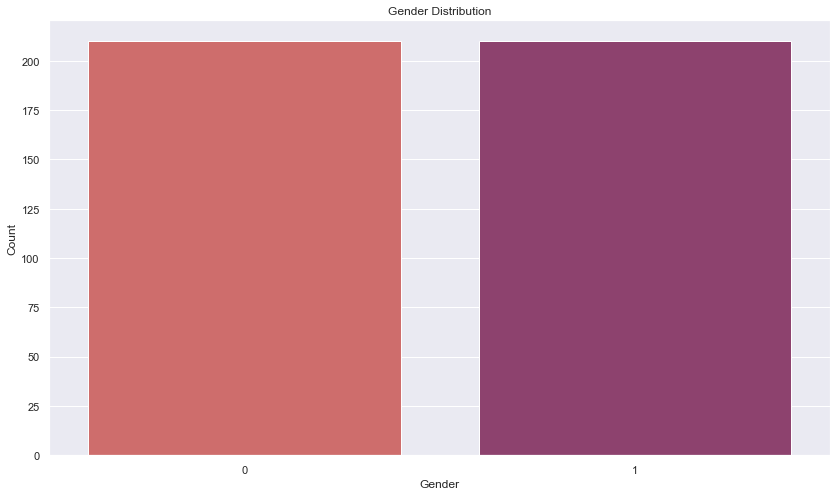

In [9]:
plt.figure(figsize=(14,8))
sns.countplot( x='gender', data=age_gender, palette='flare')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution');

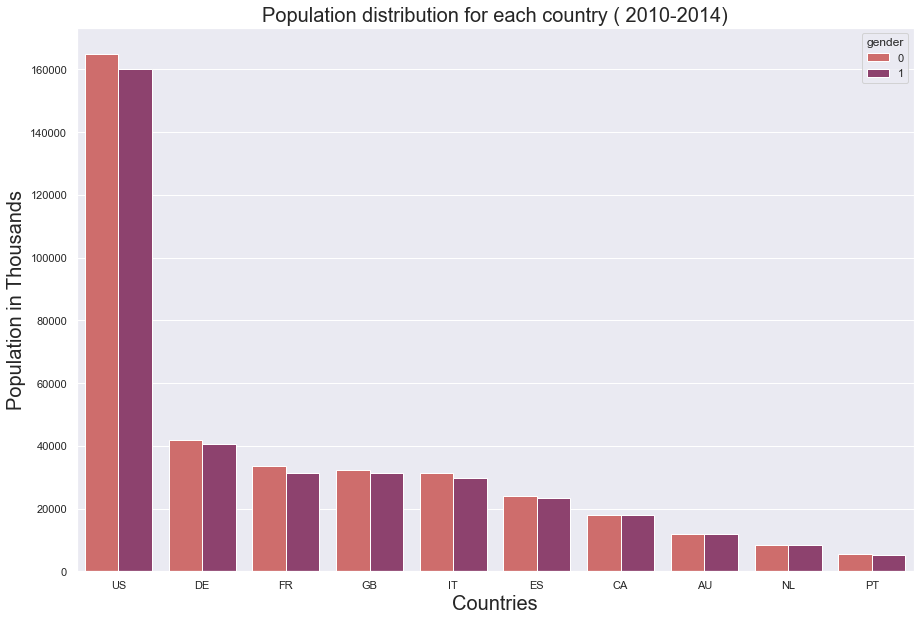

In [10]:
plt.figure(figsize=(15,10))
order_by_population=age_gender.groupby('country_destination').mean('population_in_thousands').sort_values(ascending=False,by='population_in_thousands').index
sns.barplot( x='country_destination',y='population_in_thousands',hue='gender', data=age_gender, palette='flare',order=order_by_population,estimator=sum, ci=None);
plt.xlabel('Countries',fontsize=20)
plt.ylabel('Population in Thousands',fontsize=20)
plt.title('Population distribution for each country ( 2010-2014)',fontsize=20);

We concluded that **the United States** is **the most country that uses the Airbnb** at this time, **The number of users of the Airbnb is slightly more females than males**.

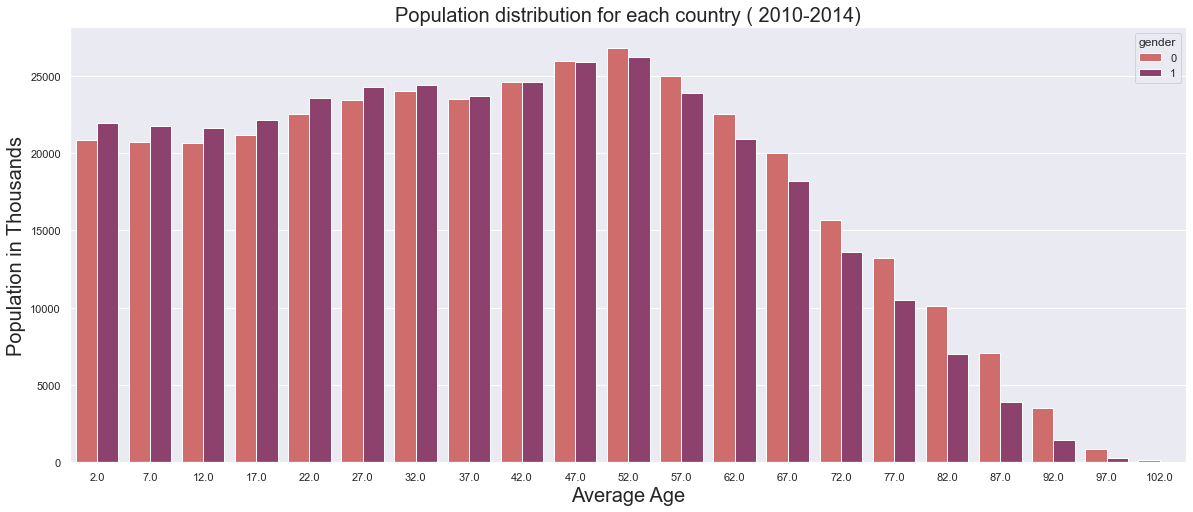

In [11]:
plt.figure(figsize=(20,8))
sns.barplot(x='age_Avg', y='population_in_thousands', hue='gender', data=age_gender, ci=None, palette='flare',estimator=sum)
plt.xlabel('Average Age',fontsize=20)
plt.ylabel('Population in Thousands',fontsize=20)
plt.title('Population distribution for each country ( 2010-2014)',fontsize=20);

We concluded that **The largest groups** are people with **mean ages 47 years and 52 years**.<br>
After the age 52, As the **age** of users **increases over 52**, the number of **users of a Airbnb gradually decreases**.


### Let us explore  the Sessions dataset

In [12]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed,secs_elapsed_fillna_with_median,secs_elapsed_fillna_with_mean
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,319.0,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,67753.0,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,301.0,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,22141.0,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,435.0,435.0


In [13]:
top_device_type_use=(sessions.device_type.value_counts())
top_device_type_use=pd.DataFrame(top_device_type_use).reset_index().rename(columns={"index":"device_type","device_type":"no_of_device_type"})
top_device_type_use["device_type_%"]=round((top_device_type_use["no_of_device_type"]/sum(top_device_type_use["no_of_device_type"]))*100,2)

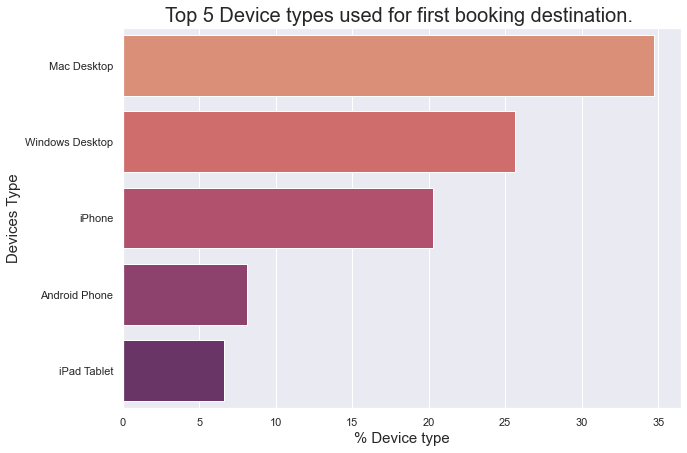

In [14]:
plt.figure(figsize=(10,7))
sns.barplot(x='device_type_%', y='device_type', data=top_device_type_use[:5],palette='flare');
plt.title("Top 5 Device types used for first booking destination. ",fontsize=20);
plt.xlabel('% Device type',fontsize=15)
plt.ylabel('Devices Type',fontsize=15);


* Around **60.4%** of a new user's first booking destination used a **Mac Desktop and Windows Desktop**.
* We have noticed that **iPhone** users are **more than twice** as many as **Android** users to book the first destination.
* An interesting insight is that **Apple Products are extremely popular with Airbnb Users**. 

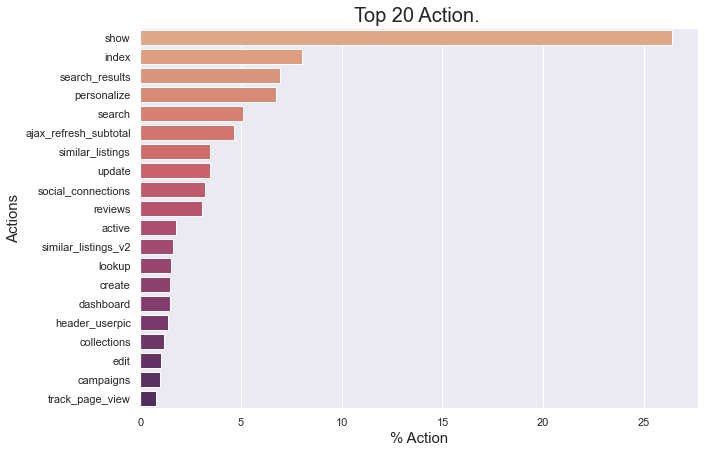

In [15]:
top_action=(sessions['action'].value_counts())
top_action=pd.DataFrame(top_action).reset_index().rename(columns={"index":"action","action":"no_of_action"})
top_action["action_%"]=round((top_action["no_of_action"]/sum(top_action["no_of_action"]))*100,2)
plt.figure(figsize=(10,7))
sns.barplot(x='action_%', y='action', data=top_action[:20],palette='flare');
plt.title("Top 20 Action. ",fontsize=20);
plt.xlabel('% Action',fontsize=15)
plt.ylabel('Actions',fontsize=15);


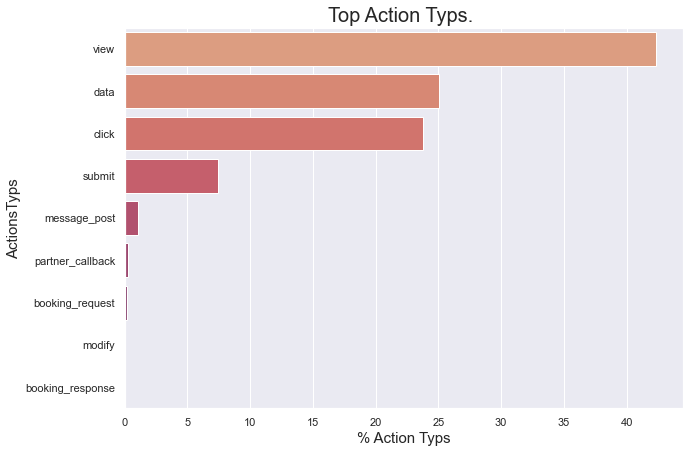

In [16]:
top_action_type=(sessions['action_type'].value_counts())
top_action_type=pd.DataFrame(top_action_type).reset_index().rename(columns={"index":"action_type","action_type":"no_of_action_type"})
top_action_type["action_type_%"]=round((top_action_type["no_of_action_type"]/sum(top_action_type["no_of_action_type"]))*100,2)
plt.figure(figsize=(10,7))
sns.barplot(x='action_type_%', y='action_type', data=top_action_type,palette='flare');
plt.title("Top Action Typs. ",fontsize=20);
plt.xlabel('% Action Typs',fontsize=15)
plt.ylabel('ActionsTyps',fontsize=15);


Around **90%**  of action types is **view and data and click**

-------------------------------------------------------------------------------------------------------------
**Let us see if the user has more than one record, and if he/she has, we will try to group them in one row for each user id**


In [17]:
print("length of unique user id :",len(sessions.user_id.unique()))
print("length of all user id :",len(sessions.user_id))

length of unique user id : 135483
length of all user id : 10533241


So can see that **user may have more than one record** , Let's group them in one row

In [18]:
#https://stackoverflow.com/questions/34776651/concatenate-rows-of-pandas-dataframe-with-same-id

session_df_group = sessions.groupby('user_id', as_index=False).agg(lambda x: x.tolist())

print(session_df_group.shape)

session_df_group.head()

(135483, 8)


,user_id,action,action_type,action_detail,device_type,secs_elapsed,secs_elapsed_fillna_with_median,secs_elapsed_fillna_with_mean
0,00023iyk9l,"[index, dashboard, header_userpic, dashboard, ...","[view, view, data, view, partner_callback, mes...","[view_search_results, dashboard, header_userpi...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ...","[20438.0, 787.0, 850.0, 934.0, 1146.0, 129817....","[20438.0, 787.0, 850.0, 934.0, 19411.243753605..."
1,0010k6l0om,"[search_results, show, personalize, show, sear...","[click, view, data, nan, click, click, nan, da...","[view_search_results, p3, wishlist_content_upd...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,..."
2,001wyh0pz8,"[search, search, search, show, social_connecti...","[click, click, click, view, data, nan, view, n...","[view_search_results, view_search_results, vie...","[Android App Unknown Phone/Tablet, Android App...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ..."
3,0028jgx1x1,"[show, reviews, show, search, show, search, re...","[view, data, view, click, view, click, data, s...","[user_profile, listing_reviews, p3, view_searc...","[nan, nan, nan, nan, nan, nan, nan, Android Ph...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0..."
4,002qnbzfs5,"[social_connections, payment_methods, create, ...","[data, nan, nan, view, data, data, data, nan, ...","[user_social_connections, nan, nan, user_profi...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782..."


In [19]:
session_df_group['action'] = session_df_group['action'].apply(action_toString)
session_df_group['action_type'] = session_df_group['action_type'].apply(action_toString)
session_df_group['action_detail'] = session_df_group['action_detail'].apply(action_toString)
session_df_group['device_type'] = session_df_group['device_type'].apply(device_toString)
session_df_group['secs_elapsed'] = session_df_group['secs_elapsed'].apply(sumSec_4_user)

In [20]:
session_df_group.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed,secs_elapsed_fillna_with_median,secs_elapsed_fillna_with_mean
0,00023iyk9l,index dashboard header_userpic dashboard callb...,view view data view partner_callback message_p...,view_search_results dashboard header_userpic d...,"iPhone,Mac Desktop",867896.0,"[20438.0, 787.0, 850.0, 934.0, 1146.0, 129817....","[20438.0, 787.0, 850.0, 934.0, 19411.243753605..."
1,0010k6l0om,search_results show personalize show search_re...,click view data click click data view partne...,view_search_results p3 wishlist_content_update...,Mac Desktop,586543.0,"[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,..."
2,001wyh0pz8,search search search show social_connections i...,click click click view data view view vie...,view_search_results view_search_results view_s...,Android App Unknown Phone/Tablet,282965.0,"[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ..."
3,0028jgx1x1,show reviews show search show search reviews c...,view data view click view click data submit c...,user_profile listing_reviews p3 view_search_re...,",Android Phone",297010.0,"[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0..."
4,002qnbzfs5,social_connections payment_methods create show...,data view data data data data view view vi...,user_social_connections user_profile unavail...,",iPhone",6487080.0,"[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782..."


In [21]:
temp = train_users.merge(session_df_group, left_on='id', right_on='user_id', how='inner')


In [22]:
# Join train and session df

print("Train  :",train_users.shape)

print("Session:",session_df_group.shape)

print("Merge  :",temp.shape)

print("No of users in Train Data with session info:",temp.shape[0])

print("{} / {} = {}".format(temp.shape[0],temp.shape[0],np.round((temp.shape[0]/train_users.shape[0]),2)))

Train  : (213451, 15)
Session: (135483, 8)
Merge  : (73815, 23)
No of users in Train Data with session info: 73815
73815 / 73815 = 0.35


Around **35 %** of users in train data **have session info**

In [23]:
# Join train and session df

print("Train  :",test_users.shape)

print("Session:",session_df_group.shape)

print("Merge  :",temp.shape)

print("No of users in Train Data with session info:",temp.shape[0])

print("{} / {} = {}".format(temp.shape[0],temp.shape[0],np.round((temp.shape[0]/test_users.shape[0]),2)))

Train  : (62096, 14)
Session: (135483, 8)
Merge  : (73815, 23)
No of users in Train Data with session info: 73815
73815 / 73815 = 1.19


Around **1 %** of users in test data **have session info**

In [24]:
temp_only_NDF = temp[temp['country_destination'] == 'NDF']

### Let see the most frequent actions with NDF.

100%|██████████████████████████████████████████████████████████████████████████| 45041/45041 [00:25<00:00, 1797.16it/s]


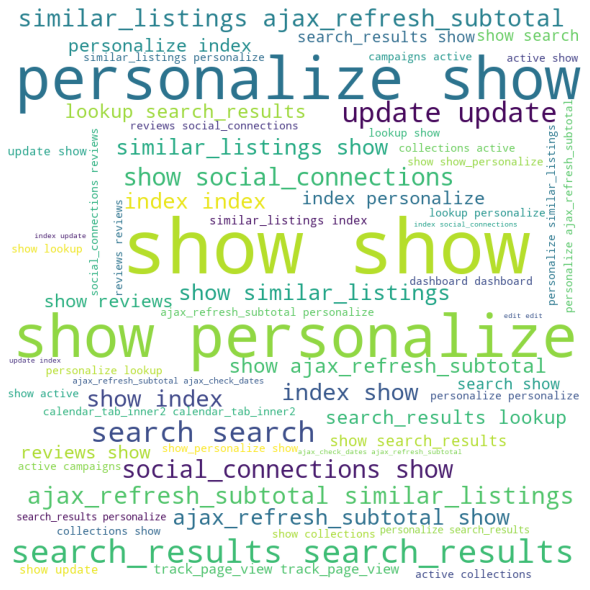

In [25]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_only_NDF['action']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Let see the most frequent actionsType with NDF.

100%|█████████████████████████████████████████████████████████████████████████| 45041/45041 [00:04<00:00, 10080.64it/s]


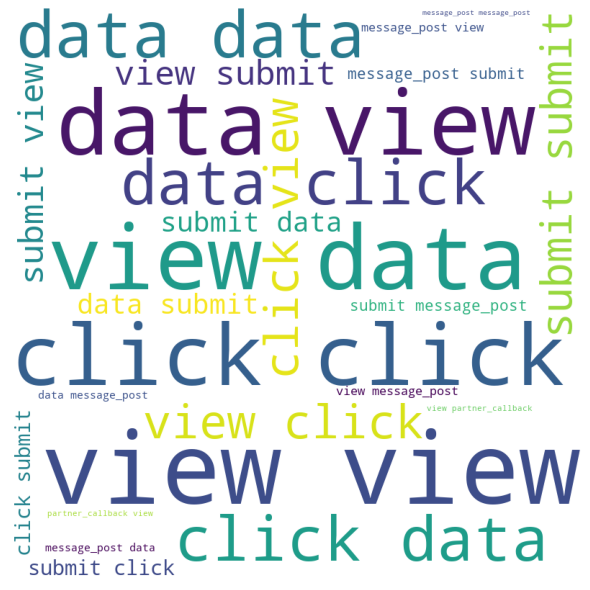

In [26]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_only_NDF['action_type']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Let see the most frequent deviceType with NDF.

100%|████████████████████████████████████████████████████████████████████████| 45041/45041 [00:00<00:00, 625411.82it/s]


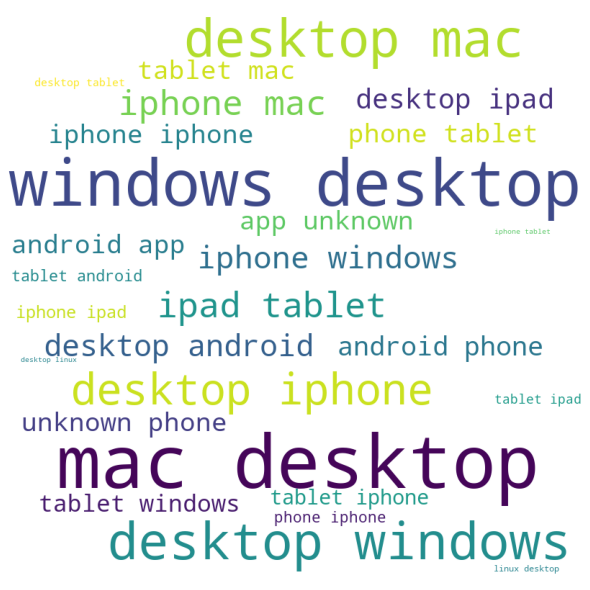

In [27]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_only_NDF['device_type']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [28]:
temp_without_NDF = temp[temp['country_destination'] != 'NDF']

### Let see the most frequent actions without NDF.

100%|██████████████████████████████████████████████████████████████████████████| 28774/28774 [00:16<00:00, 1778.67it/s]


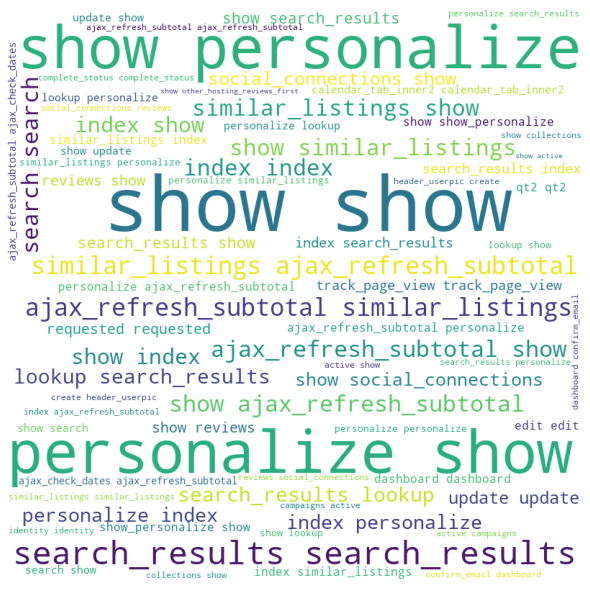

In [29]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_without_NDF['action']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Let see the most frequent actionsType without NDF.

100%|██████████████████████████████████████████████████████████████████████████| 28774/28774 [00:03<00:00, 9517.45it/s]


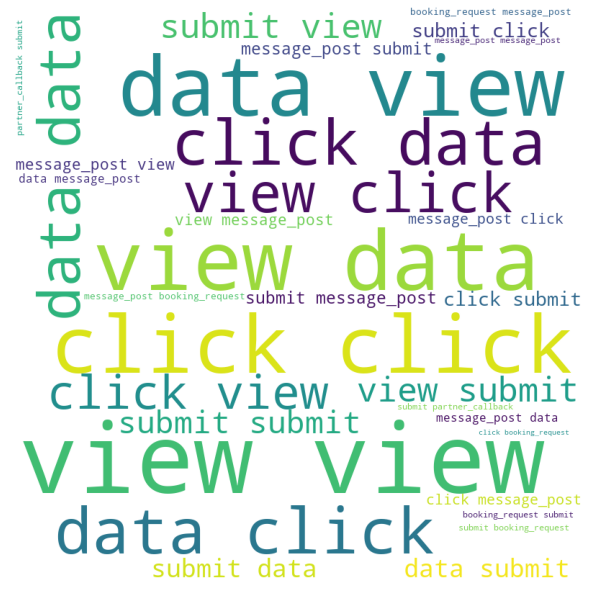

In [30]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_without_NDF['action_type']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Let see the most frequent devices without NDF.

100%|████████████████████████████████████████████████████████████████████████| 28774/28774 [00:00<00:00, 618580.46it/s]


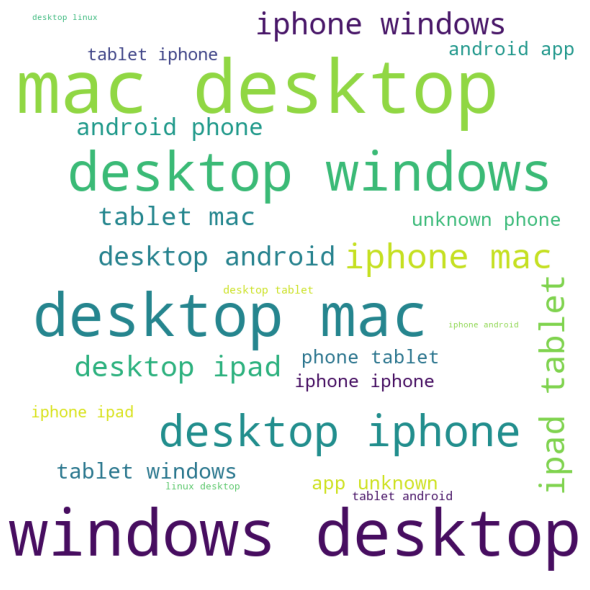

In [31]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_without_NDF['device_type']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### let us see the distribution of time spent in-app/web

In [32]:
temp.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,user_id,action,action_type,action_detail,device_type,secs_elapsed,secs_elapsed_fillna_with_median,secs_elapsed_fillna_with_mean
0,d1mm9tcy42,2014-01-01,2014-01-01 00:09:36,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,d1mm9tcy42,lookup search_results lookup search_results lo...,click click click data view click data v...,view_search_results view_search_results vie...,",Windows Desktop",3427529.0,"[319.0, 67753.0, 301.0, 22141.0, 435.0, 7703.0...","[319.0, 67753.0, 301.0, 22141.0, 435.0, 7703.0..."
1,yo8nz8bqcq,2014-01-01,2014-01-01 00:15:58,NaN,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,yo8nz8bqcq,dashboard create confirm_email show show_perso...,view submit click view data view data data,dashboard create_user confirm_email_link p3 us...,Mac Desktop,207842.0,"[2739.0, 1146.0, 115983.0, 20285.0, 3255.0, 47...","[2739.0, 19411.243753605344, 115983.0, 20285.0..."
2,4grx6yxeby,2014-01-01,2014-01-01 00:16:39,NaN,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF,4grx6yxeby,verify create pending requested header_userpi...,submit message_post booking_request view data...,create_user message_post pending p5 header_us...,",Windows Desktop",1135444.0,"[65080.0, 1146.0, 59801.0, 1000.0, 1624.0, 513...","[65080.0, 19411.243753605344, 59801.0, 1000.0,..."
3,ncf87guaf0,2014-01-01,2014-01-01 00:21:46,NaN,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,ncf87guaf0,lookup show search_results search_results show...,view click click view view click data data da...,p3 view_search_results view_search_results p3...,",Windows Desktop,Android Phone",3755100.0,"[2204.0, 10834.0, 575.0, 578.0, 12407.0, 829.0...","[2204.0, 10834.0, 575.0, 578.0, 12407.0, 829.0..."
4,4rvqpxoh3h,2014-01-01,2014-01-01 00:26:19,NaN,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,NaN,GB,4rvqpxoh3h,campaigns active create notifications listings...,,,iPhone,2555.0,"[375.0, 728.0, 1146.0, 187.0, 154.0, 204.0, 21...","[375.0, 728.0, 19411.243753605344, 187.0, 154...."


In [33]:
temp['booked']=temp['country_destination'].apply(lambda x : 'NO' if x =='NDF' else 'YES')

In [34]:
temp[['booked','country_destination']].head()
temp['mins_elapsed']=temp['secs_elapsed']/60
temp['hrs_elapsed']=temp['secs_elapsed']/(60*60)

In [35]:
temp.groupby('booked')[['mins_elapsed']].describe().T

booked                         NO            YES
mins_elapsed count   45041.000000   28774.000000
             mean    21392.937064   31254.892611
             std     28513.531256   35725.991493
             min         0.000000       0.000000
             25%      2972.316667    7485.395833
             50%     11463.933333   19817.425000
             75%     28924.350000   42229.241667
             max    637022.716667  523221.533333

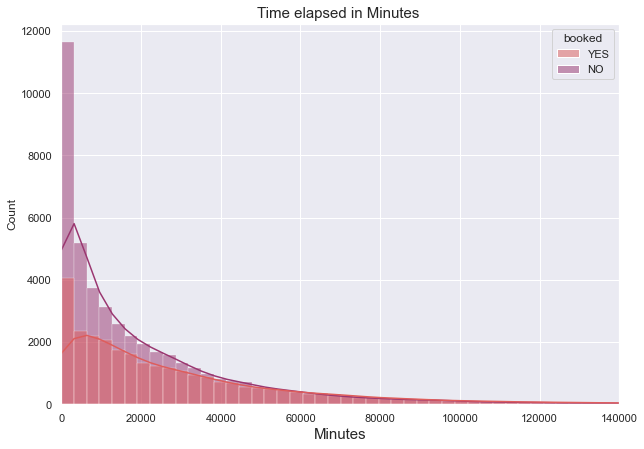

In [36]:
sns.histplot(data=temp,x='mins_elapsed',hue='booked',bins=200,palette='flare',kde=True)
plt.xlim(0,140000) 
plt.axvline(5, color='g', linestyle='dashed', linewidth=2)

plt.xlabel('Minutes',fontsize=15)

plt.title('Time elapsed in Minutes ',fontsize=15);

plt.show()

### Let us explore the Training Users¶ dataset

In [37]:
train_users.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [38]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   gender                   117763 non-null  category      
 4   age                      123853 non-null  float64       
 5   signup_method            213451 non-null  category      
 6   signup_flow              213451 non-null  int64         
 7   language                 213451 non-null  category      
 8   affiliate_channel        213451 non-null  category      
 9   affiliate_provider       213451 non-null  category      
 10  first_affiliate_tracked  207386 non-null  category      
 11  signup_app               213451 non-null  category      
 12  first_device_typ

In [39]:
top_country_destination=(train_users.country_destination.value_counts())
top_country_destination=pd.DataFrame(top_country_destination).reset_index().rename(columns={"index":"country_destination","country_destination":"no_of_country_destination"})
top_country_destination["country_destinatione_%"]=round((top_country_destination["no_of_country_destination"]/sum(top_country_destination["no_of_country_destination"]))*100,2)

In [40]:
! pip install squarify

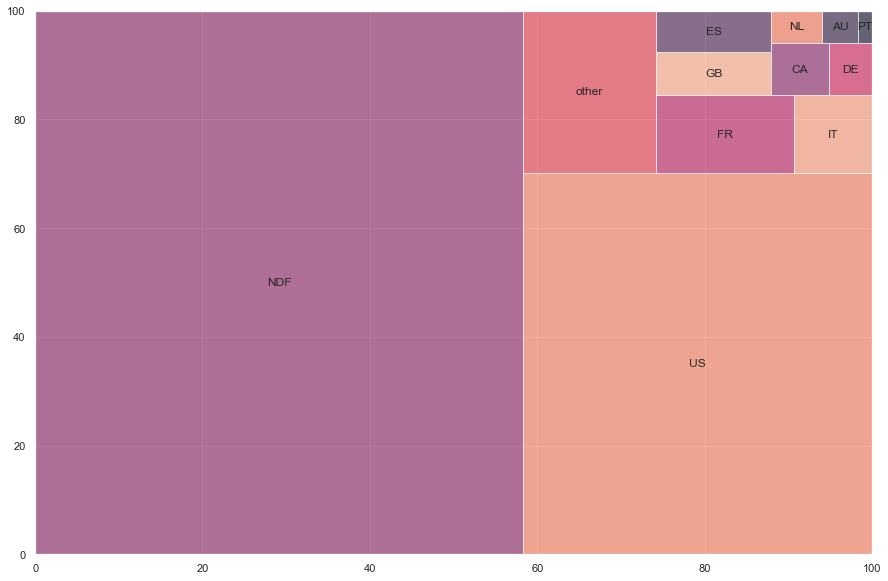

In [41]:
import matplotlib.pyplot as plt
import squarify 
plt.figure(figsize=(15,10))

squarify.plot(sizes=top_country_destination['country_destinatione_%'], label=top_country_destination['country_destination'], alpha=0.6 )
plt.show()

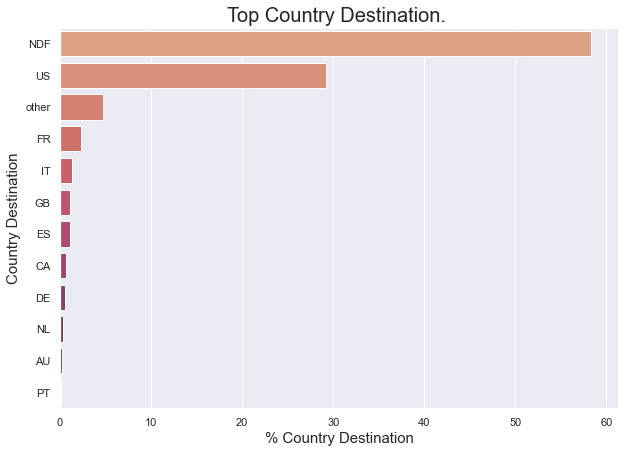

In [42]:
plt.figure(figsize=(10,7))
sns.barplot(x='country_destinatione_%', y='country_destination', data=top_country_destination,palette='flare');
plt.title("Top Country Destination. ",fontsize=20);
plt.xlabel('% Country Destination',fontsize=15)
plt.ylabel('Country Destination',fontsize=15);


* around **60%** of the users **did not end up booking any trip** represented by **NDF**.<br> 
* A majority of users booked a destination in **US** around **30%** considering that user population in this problem is from US. Thus, my inference is that US travelers tend to travel within US itself.

In [7]:
train_users_without_NDF = train_users[train_users['country_destination']!='NDF']

In [8]:
train_users_without_NDF['year_account_created'] = train_users_without_NDF.date_account_created.dt.year

C:\Users\MElBa\AppData\Local\Temp\ipykernel_11760\1845867620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_users_without_NDF['year_account_created'] = train_users_without_NDF.date_account_created.dt.year


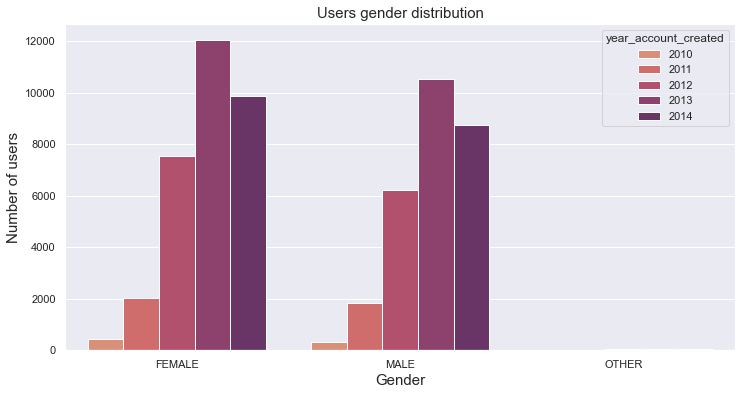

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='gender',hue='year_account_created', data=train_users_without_NDF,palette='flare')
plt.xlabel('Gender',fontsize=15)

plt.ylabel('Number of users',fontsize=15)

plt.title('Users gender distribution',fontsize=15);



Like we said before **the number of users of Airbnb is slightly more females than males**.

There are a few reasons so can be women use Airbnb more than men
* There gender bais most hosts prefer to host women than men
due to being afraid to host scary men and etc.
* Women hosts more than men hosts
* Women host service better than men
So there are more opportunities for women to find good hosts than men 

Despite an Airbnb attempt to set rules for Nondiscrimination , it still exist


**Reference** <br>
https://ipropertymanagement.com/research/airbnb-statistics<br>
https://www.airbnb.com/help/article/2867/nondiscrimination-policy

# Hypothesis Testing

###  Is there a relationship between country preference and the gender of the user? 

* H0: No relationship between country preference and the gender of the user.
* H1: There is a relationship between country preference and the gender of the user.

We will assume our significance level, to be 0.05.

In [45]:
df_forHypothesis = train_users_without_NDF[(train_users_without_NDF['age'].notnull()) & (train_users_without_NDF['country_destination'] != 'other') & (train_users_without_NDF['gender'] != 'OTHER') & (train_users_without_NDF['gender'].notnull())]
obs=pd.crosstab(index=df_forHypothesis['gender'], columns=df_forHypothesis['country_destination'])
obs

country_destination,AU,CA,DE,ES,FR,GB,IT,NL,PT,US
gender,,,,,,,,,,
FEMALE,195,419,325,800,1796,817,1004,230,70,21118
MALE,174,445,386,623,1246,646,644,261,63,18396


In [46]:

chi2,p_value, dof, expected = stats.chi2_contingency(obs)
print('chi2= %.3f, p= %.25f' % (chi2, p_value))
print("-"*35)

if p_value < 0.05:
    print('Ho: There is no relationship between country preference and the sex of the customer will be rejected.')
    print('There is a relationship between country preference and the sex of the customer.')
else: 
    print('Ho: There is no relationship between country preference and the sex of the customer IS TRUE!')

chi2= 113.100, p= 0.0000000000000000000343384
-----------------------------------
Ho: There is no relationship between country preference and the sex of the customer will be rejected.
There is a relationship between country preference and the sex of the customer.


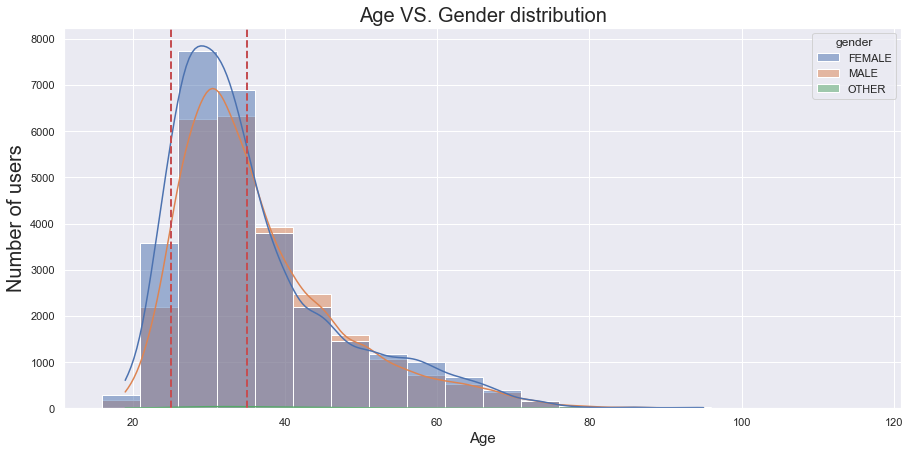

In [47]:
plt.figure(figsize=(15,7))
sns.histplot(data=train_users_without_NDF[(train_users_without_NDF['age'].notna())&(train_users_without_NDF['age']<=95)],x='age',hue='gender',bins=np.arange(16,115+5,5),kde=True)
plt.xlabel('Age',fontsize=15)

plt.ylabel('Number of users',fontsize=20)
plt.title('Age VS. Gender distribution',fontsize=20)
plt.axvline(25, color='r', linestyle='dashed', linewidth=2)
plt.axvline(35, color='r', linestyle='dashed', linewidth=2)
plt.show()

Most of users booking trips **between 25 and 35**

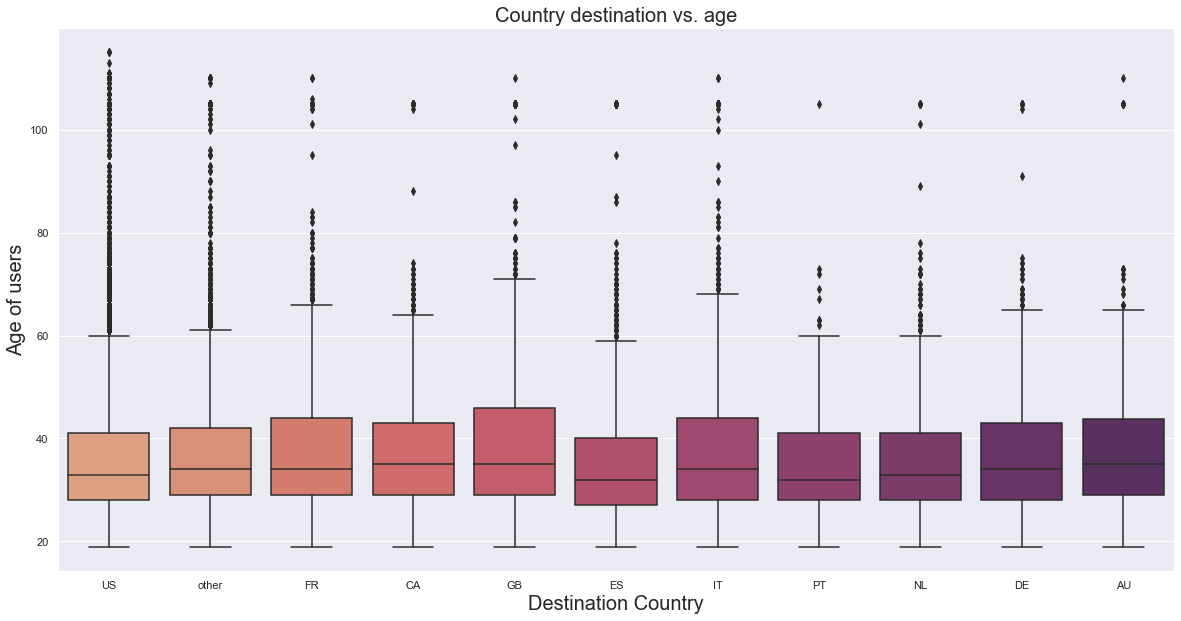

In [48]:
plt.figure(figsize=(20,10))
sns.boxplot(x='country_destination', y='age', data=train_users_without_NDF, palette="flare");
plt.xlabel('Destination Country',fontsize=20)
plt.ylabel('Age of users',fontsize=20)
plt.title('Country destination vs. age',fontsize=20);


There is **no significant age difference** among the users booking trips to the destinations displayed in the graph. <br>However, **Great Britain** has the **highest median age** of travellers and **Spain** is **more popular amongst younger** travellers.

In [49]:
order2=train_users_without_NDF.first_browser.value_counts().index


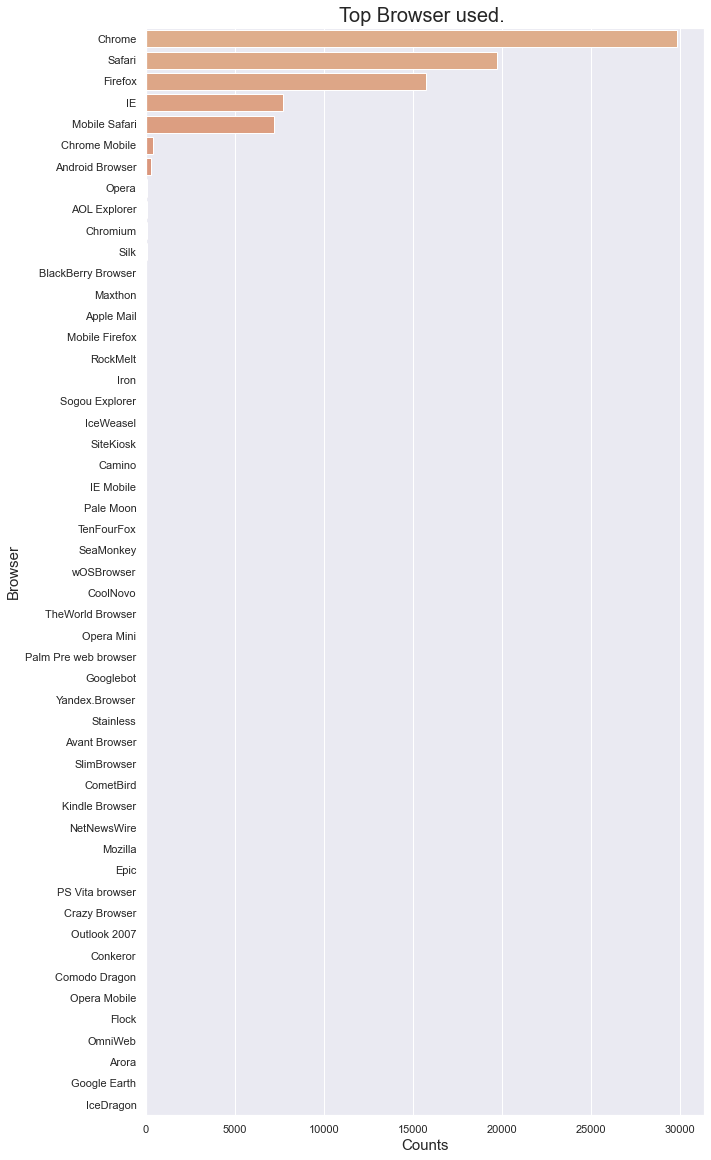

In [50]:
plt.figure(figsize=(10,20))

sns.countplot(y='first_browser',data=train_users_without_NDF,order=order2, palette="flare");
plt.title("Top Browser used. ",fontsize=20);
plt.xlabel('Counts',fontsize=15)
plt.ylabel('Browser',fontsize=15);

* around **80.36%** of the users used **Chrome,Safari and Firefox** for first booking.<br>  
* Top 5 browsers users used are **'Chrome', 'Safari', 'Firefox', 'IE', 'Mobile Safari'**.<br> 
* and this **ensure** that **IOS devices** are **most popular due to top 5 have two IOS devices** .

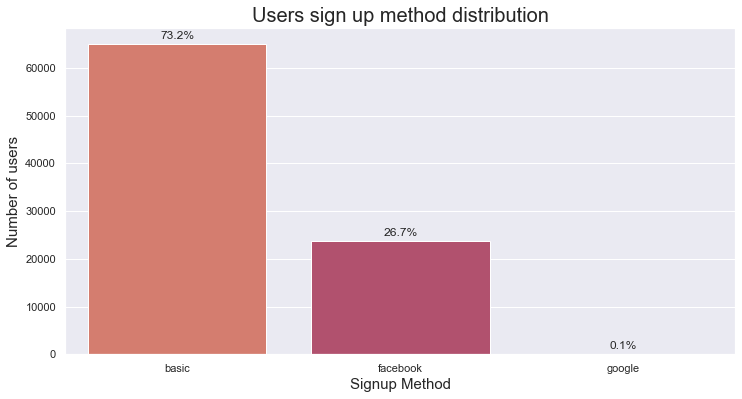

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x='signup_method', data = train_users_without_NDF, palette="flare");
plt.xlabel('Signup Method',fontsize=15);
plt.ylabel('Number of users',fontsize=15);
plt.title('Users sign up method distribution',fontsize=20);

order2 = train_users_without_NDF['signup_method'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / train_users_without_NDF.shape[0])
    plt.text(i,count+1000,strt,ha='center')

around **73%** of the users used the **basic method (email)** to **sign up** with Airbnb.

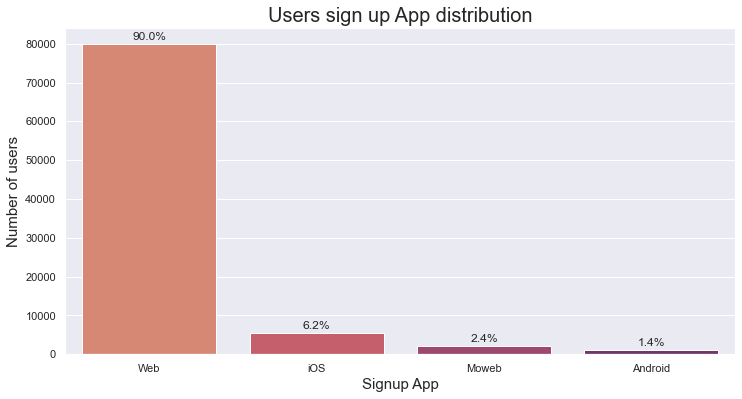

In [52]:
plt.figure(figsize=(12,6))
order1 = train_users_without_NDF['signup_app'].value_counts().index

sns.countplot(x='signup_app', data = train_users_without_NDF, palette="flare",order=order1);
plt.xlabel('Signup App',fontsize=15);
plt.ylabel('Number of users',fontsize=15);
plt.title('Users sign up App distribution',fontsize=20);

order2 = train_users_without_NDF['signup_app'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / train_users_without_NDF.shape[0])
    plt.text(i,count+1000,strt,ha='center')

around **90%** of the users used the **Web** to **sign up** with Airbnb.

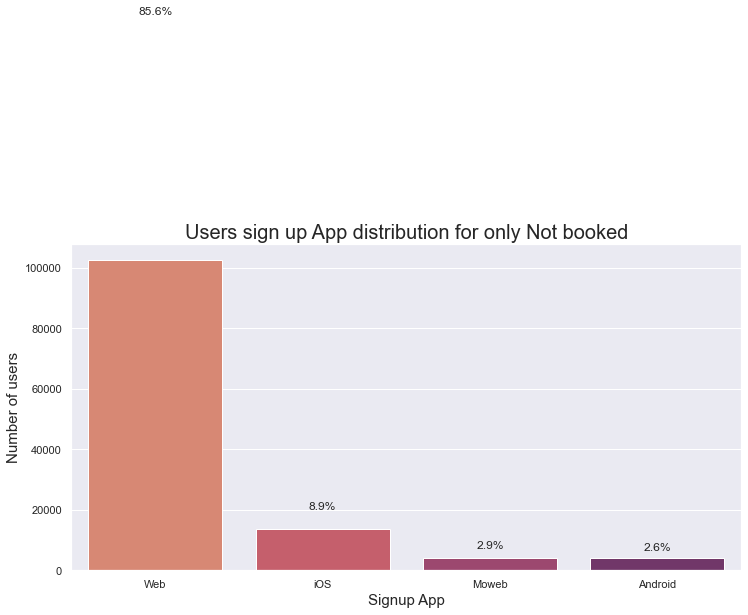

In [53]:
plt.figure(figsize=(12,6))
order1 = train_users['signup_app'].value_counts().index

sns.countplot(x='signup_app', data = train_users[train_users['country_destination']=='NDF'], palette="flare",order=order1);
plt.xlabel('Signup App',fontsize=15);
plt.ylabel('Number of users',fontsize=15);
plt.title('Users sign up App distribution for only Not booked',fontsize=20);

order2 = train_users['signup_app'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / train_users.shape[0])
    plt.text(i,count+1000,strt,ha='center')

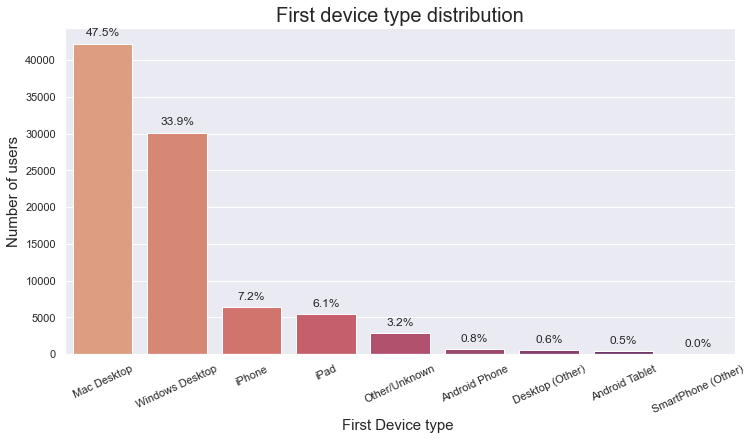

In [54]:
plt.figure(figsize=(12,6))
order1 = train_users_without_NDF['first_device_type'].value_counts().index

sns.countplot(x='first_device_type', data = train_users_without_NDF, palette="flare",order=order1);
plt.xlabel('First Device type ',fontsize=15);
plt.xticks(rotation=25)
plt.ylabel('Number of users',fontsize=15);
plt.title('First device type distribution',fontsize=20);

order2 = train_users_without_NDF['first_device_type'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / train_users_without_NDF.shape[0])
    plt.text(i,count+1000,strt,ha='center')

* **Majority** of users’ signup app is **Web**.
* **Apple devices**  more popular than the **Android devices**
* **Moweb and Android** have the lowest share.

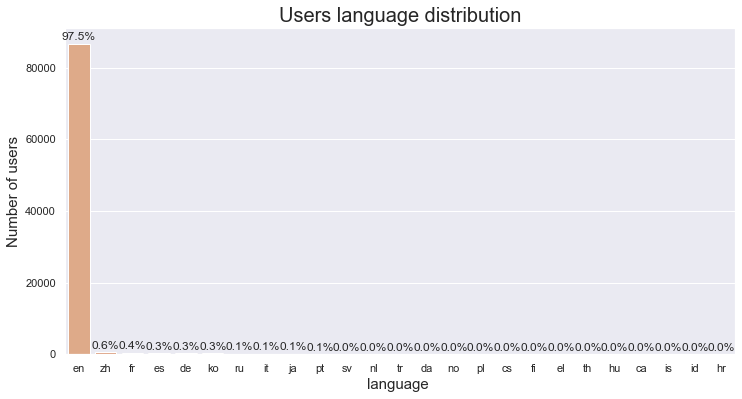

In [20]:
plt.figure(figsize=(12,6))
order1 = train_users_without_NDF['language'].value_counts().index

sns.countplot(x='language', data = train_users_without_NDF, palette="flare",order=order1);
plt.xlabel('language ',fontsize=15);
plt.ylabel('Number of users',fontsize=15);
plt.title('Users language distribution',fontsize=20);

order2 = train_users_without_NDF['language'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / train_users_without_NDF.shape[0])
    plt.text(i,count+1000,strt,ha='center')

In [56]:
train_users_without_NDF.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination'], dtype='object')

Almost all the users language preference is English. This is reasonable as our population for
the problem comes from US.

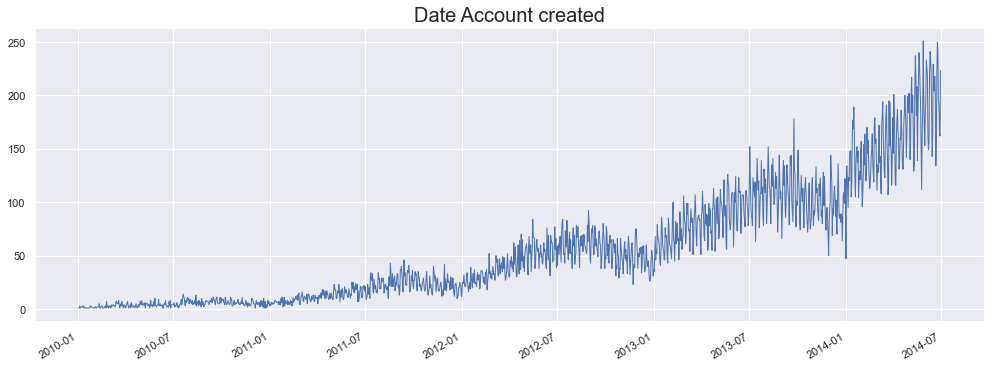

In [57]:
plt.figure(figsize=(17,6))


train_users_without_NDF['date_account_created'].value_counts().plot(kind='line', linewidth=1)
plt.title('Date Account created',fontsize=20);

plt.show()

Airbnb’s popularity has **increased exponentially** from 2010 to 2014.

In [58]:
train_users_without_NDF['timestamp_first_active']

2        2009-06-09 23:12:47
3        2009-10-31 06:01:29
4        2009-12-08 06:11:05
5        2010-01-01 21:56:19
6        2010-01-02 01:25:58
                 ...        
213415   2014-06-30 23:01:36
213439   2014-06-30 23:47:29
213441   2014-06-30 23:51:51
213443   2014-06-30 23:53:40
213445   2014-06-30 23:55:47
Name: timestamp_first_active, Length: 88908, dtype: datetime64[ns]

In [59]:
train_users_without_NDF['Month']=train_users_without_NDF['date_account_created'].dt.month

C:\Users\MElBa\AppData\Local\Temp\ipykernel_5436\624689788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_users_without_NDF['Month']=train_users_without_NDF['date_account_created'].dt.month


C:\Users\MElBa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


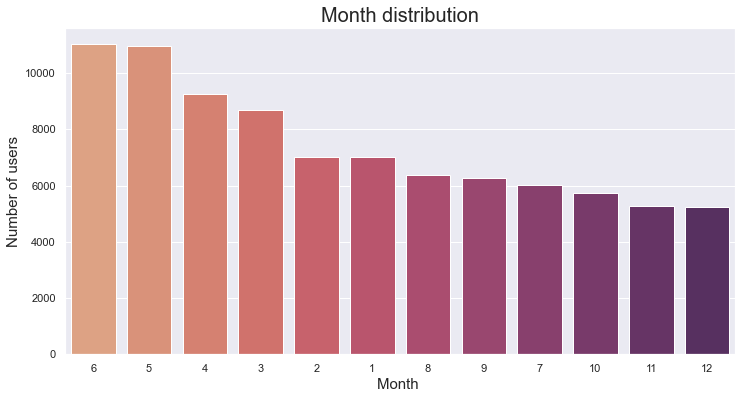

In [60]:
plt.figure(figsize=(12,6))
order1 = train_users_without_NDF['date_account_created'].dt.month.value_counts().index

sns.countplot(train_users_without_NDF['date_account_created'].dt.month, palette="flare",order=order1);
plt.xlabel('Month ',fontsize=15);
plt.ylabel('Number of users',fontsize=15);
plt.title('Month distribution',fontsize=20);


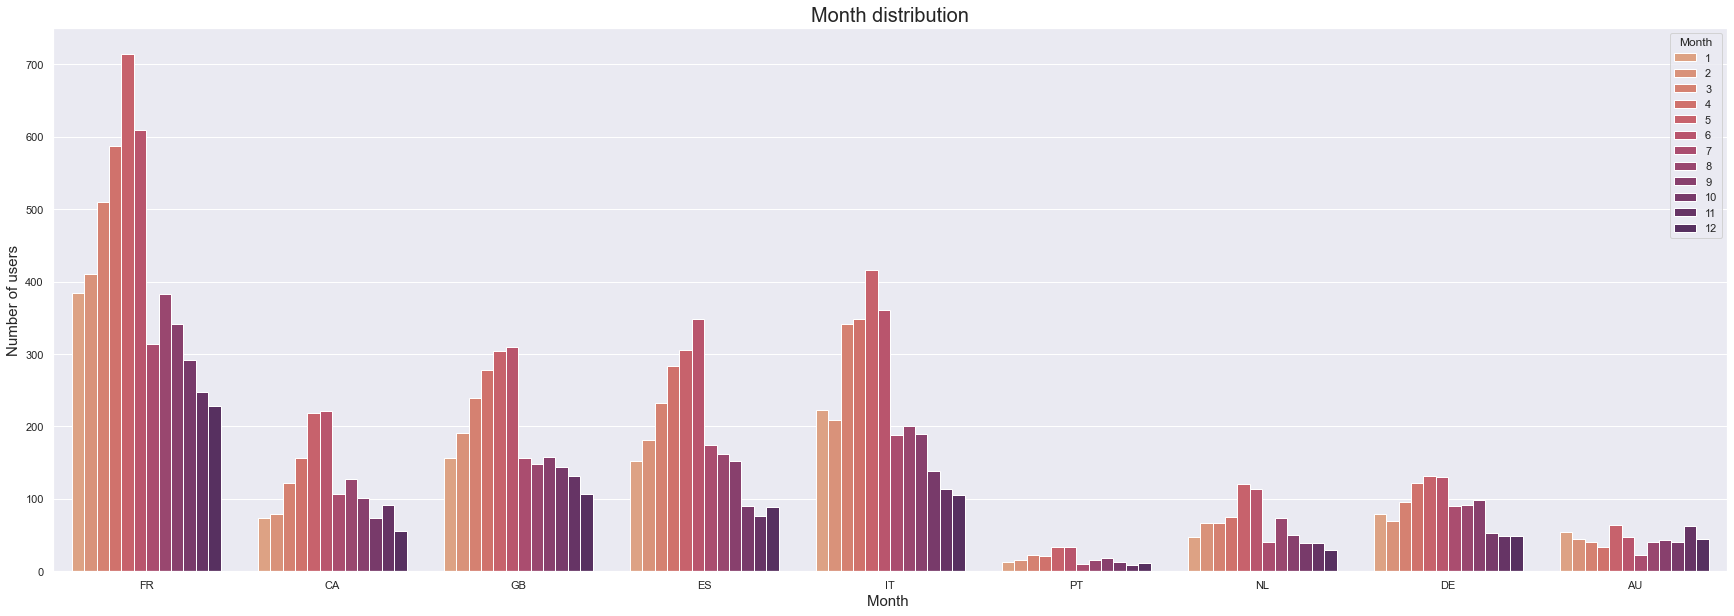

In [61]:
plt.figure(figsize=(30,10))

sns.countplot(x='country_destination',hue='Month', palette="flare",data=train_users_without_NDF[(train_users_without_NDF['country_destination']!='US')&(train_users_without_NDF['country_destination']!='other')]);
plt.xlabel('Month ',fontsize=15);
plt.ylabel('Number of users',fontsize=15);
plt.title('Month distribution',fontsize=20);


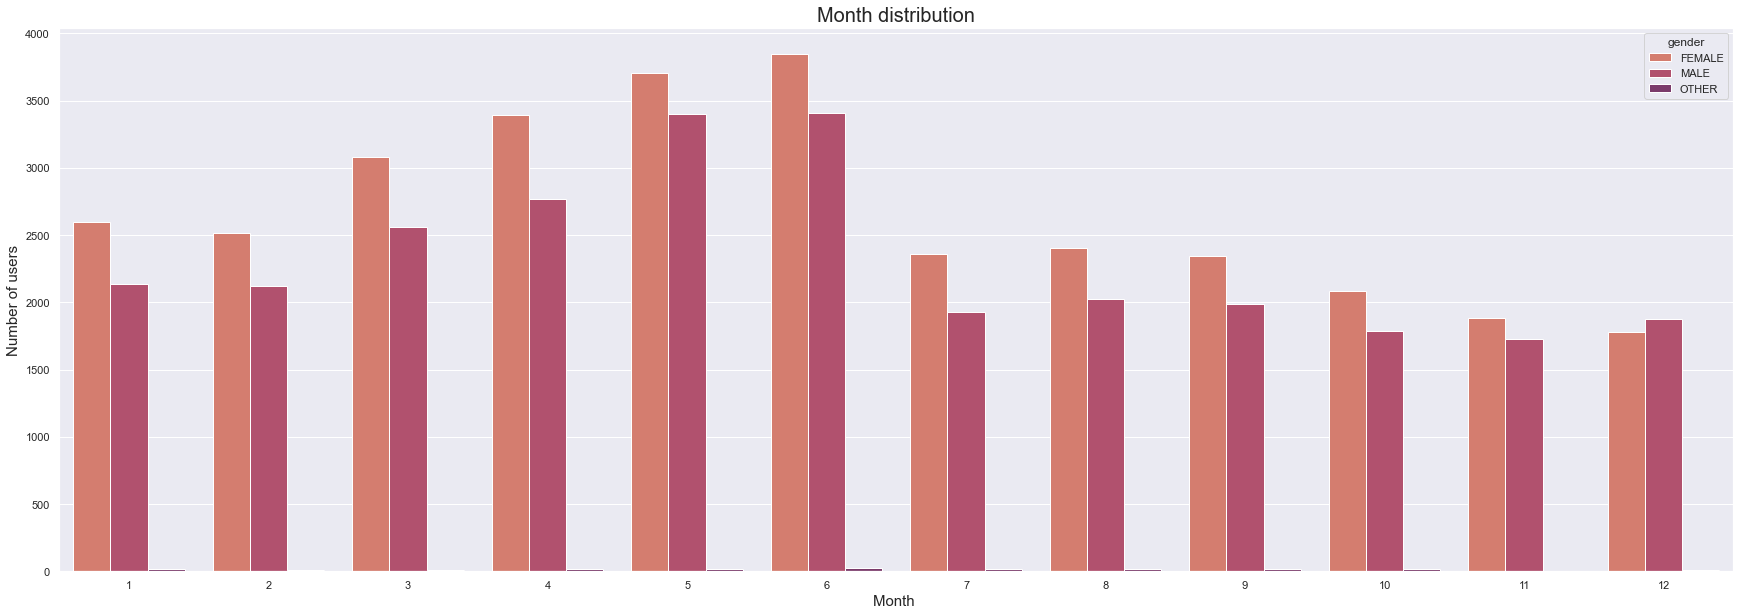

In [62]:
plt.figure(figsize=(30,10))

sns.countplot(x='Month',hue='gender', palette="flare",data=train_users_without_NDF );
plt.xlabel('Month ',fontsize=15);
plt.ylabel('Number of users',fontsize=15);
plt.title('Month distribution',fontsize=20);


We observe from figures that  **May and June** have **the highest numbers** of booking, then April and March, They prefer the months because it is **the spring season to enjoy warm temperatures and beautiful natural scenery to the national parks, forests**.


This reference is about the USA but it makes sense the majority of users from the USA :: https://www.booking.com/best-time/country/us.html 

###  Is there a significant difference between males and females mean age?

* H0:  There is no significant difference between males and females mean age . for their country of destination.
* H1: There is a significant difference between males and females mean age. for their country of destination.

We will assume our significance level, to be 0.05.

In [63]:
stat, p_value = stats.ttest_ind(df_forHypothesis[df_forHypothesis['gender']=='FEMALE']['age'], df_forHypothesis[df_forHypothesis['gender']=='MALE']['age'])
print('stat= %.3f, p= %.15f' % (stat, p_value))

print("-"*80)

if p_value < 0.05:
    print('Ho: Will be RRJECTED!.')
    print('There is significance difference between male and female mean age.')
else: 
    print('Ho: Mean of female and male age are the same IS TRUE!')

stat= -7.185, p= 0.000000000000681
--------------------------------------------------------------------------------
Ho: Will be RRJECTED!.
There is significance difference between male and female mean age.


## Conclusions
* There is a relationship between gender and Airbnb Country Destination. In other words, the gender influences your country of choice.
* There is a significant difference between males and females mean age. for their country of destination.

In [64]:
# Let us save the data after cleaning.
# sessions.to_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/sessions_v2.p')
# countries.to_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/countries_v2.p')
# age_gender.to_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/age_gender_bkts_v2.p')

# train_users.to_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/train_users_2_v2.p')
# test_users.to_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/test_users_v2.p')




# Let us save the data after cleaning. (local)
sessions.to_pickle('./datasets/afterCleaningsessions_v2.p')
countries.to_pickle('./datasets/afterCleaning/countries_v2.p')
age_gender.to_pickle('./datasets/afterCleaning/age_gender_bkts_v2.p')

train_users.to_pickle('./datasets/afterCleaning/train_users_2_v2.p')
test_users.to_pickle('./datasets/afterCleaning/test_users_v2.p')
